# CS1470/2470 HW2: Exploring Your Model

### Testing Out Your Model!

Pull in your model into the notebook, test it out using the model that you settle on, and compare it against a keras implementation of your choice! Hypothesize why your implementation may be different. 

#### **Submit as PDF with your final submission!**

**Requirements:**
- Select a model of choice. Can definitely be a single-layer model.
- A brief discussion of your dataset, including links to source, motivation, and preprocessing.
    - This can be pretty brief, since we already discuss MNIST at length. 
    - Feel free to try it on CIFAR, though this is optional!
    - Feel free to reuse code from HW1!
- Brief evaluation of your model. 
- Comparison against a keras model of similar implementation. 
    - *Feel free to use a model of your choice like in 2470 version, but you definitely don't need to do a multi-layered model.*

### **[2470]** Explore Your Own Dataset!

**Same requirements as above, but:**

- You have to pick a different dataset; not MNIST or CIFAR-10. 
- A brief discussion of your dataset, including links to source, motivation, and preprocessing.
- A network architecture motivated by your specific problem. 
    - **MUST BE MULTI-LAYERED!**
    - Discuss motivation for your design choices and hurdles you may have had to overcome. 
- Brief evaluation of your model. 
    - Include a few possible options with evaluations to motivate your final selection of model and hyperparameters. 
    - Include a few qualitative motivations or ablation studies, such as a per-class performance breakdown, visualizations, or similar. 
- Comparison against a keras model of similar implementation.

---

## Dataset

**YOUR DISCUSSION HERE!**

- [**1470**] Feel free to change up the code, but this is probably the easiest way to go about this.
- [**2470**] Modify accordingly. Feel free to make more cell blocks as well!

*Feel free to clear out this markdown cell block and override with your actual discussion.*

In [1]:
## 1470: Feel free to change, but this is probably the easiest way to go about this.
## 2470: Modify accordingly. Feel free to make more cell blocks as well
%load_ext autoreload
%autoreload 1
%aimport Beras, assignment, preprocess

data_path = "../data"

## Import MNIST train and test examples into train and testing data
import preprocess
X0, Y0 = preprocess.get_data_MNIST('train')#, data_path)
X1, Y1 = preprocess.get_data_MNIST('test')#,  data_path)

print("Training Shapes:", X0.shape, Y0.shape)
print("Testing  Shapes:", X1.shape, Y1.shape)

Training Shapes: (60000, 784) (60000,)
Testing  Shapes: (10000, 784) (10000,)


## My Beras Model

**YOUR DISCUSSION HERE!**

- [**1470**] Feel free to change up the code, but this is probably the easiest way to go about this.
- [**2470**] Modify accordingly. Feel free to make more cell blocks as well!

*Feel free to clear out this markdown cell block and override with your actual discussion.*

In [2]:
from Beras.onehot import OneHotEncoder
from visualize import visualize_images, visualize_metrics
from assignment import SequentialModel
import numpy as np

## Read in MNIST data, use the OneHotEncoder class to one hot encode the labels,
## instantiate and compile your model, and train your model
ohe = OneHotEncoder()
ohe.fit(np.concatenate([Y0, Y1], axis=-1))


In [3]:
from Beras.activations import LeakyReLU, ReLU, Softmax
from Beras.layers import Dense
from Beras.losses import CategoricalCrossentropy, MeanSquaredError
from Beras.metrics import CategoricalAccuracy
from Beras.optimizers import Adam, RMSProp, BasicOptimizer

model = SequentialModel([Dense(784, 10), LeakyReLU(0.0002)])
model.compile(
    optimizer=Adam(0.0005),
    loss_fn=MeanSquaredError(),
    acc_fn=CategoricalAccuracy(),
)

train_agg_metrics = model.fit(
    X0, ohe(Y0), epochs=10, batch_size=100
)

[<Beras.layers.Dense object at 0x7fc7488ec4f0>, <Beras.activations.LeakyReLU object at 0x7fc7488ec520>]
 - Epoch  1: Average Stats : {'loss': 0.0492, 'acc': 0.5433}   
 - Epoch  2: Average Stats : {'loss': 0.0314, 'acc': 0.6797}   
 - Epoch  3: Average Stats : {'loss': 0.0297, 'acc': 0.7015}   
 - Epoch  4: Average Stats : {'loss': 0.0284, 'acc': 0.7076}   
 - Epoch  5: Average Stats : {'loss': 0.02, 'acc': 0.7157}   
 - Epoch  6: Average Stats : {'loss': 0.0194, 'acc': 0.7243}   
 - Epoch  7: Average Stats : {'loss': 0.0191, 'acc': 0.7271}   
 - Epoch  8: Average Stats : {'loss': 0.0189, 'acc': 0.7297}   
 - Epoch  9: Average Stats : {'loss': 0.0187, 'acc': 0.7316}   
 - Epoch 10: Average Stats : {'loss': 0.0185, 'acc': 0.7327}   


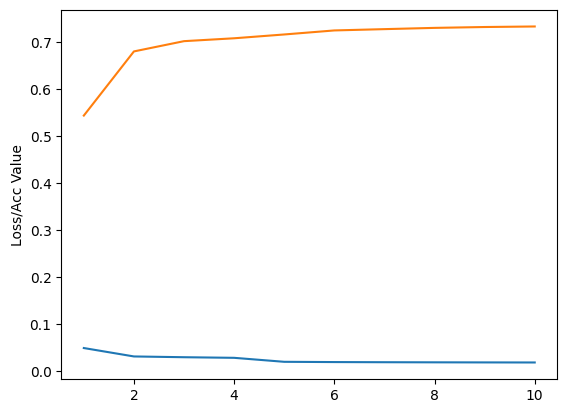

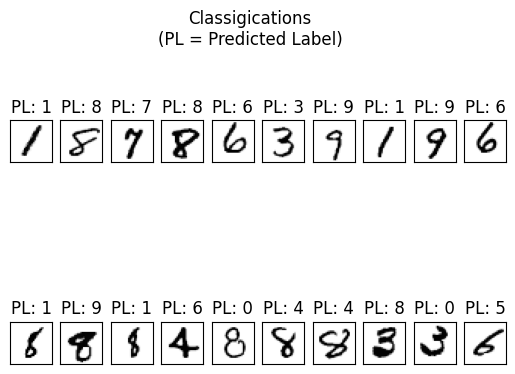

In [4]:
from visualize import visualize_images, visualize_metrics

visualize_metrics(train_agg_metrics["loss"], train_agg_metrics["acc"])
visualize_images(model, X0, ohe(Y0))
test_agg_metrics = model.evaluate(X1, ohe(Y1), batch_size=100)
# test_agg_metrics

## Keras Model Comparison

## Model Analysis

**[Required only for 2470; Feel free to delete section otherwise]**

## Discussions

Final thoughts? This can be whatever :)